In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [120]:
df = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

In [121]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


# Exploratory Data Analysis 

### Checking the number of rows and columns in the dataset

In [123]:
df.shape

(414, 9)

### Checking the number of null values in the columns 

In [124]:
df.isna().sum() #no null values 

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

### Checking the number of duplicate values in the dataset

In [125]:
df.duplicated().sum() #no duplicate values

0

### Getting a statistical description of the dataset to understand the dataset better

In [126]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


### Correlation between various features

In [127]:
correlation = df.corr()

<AxesSubplot:>

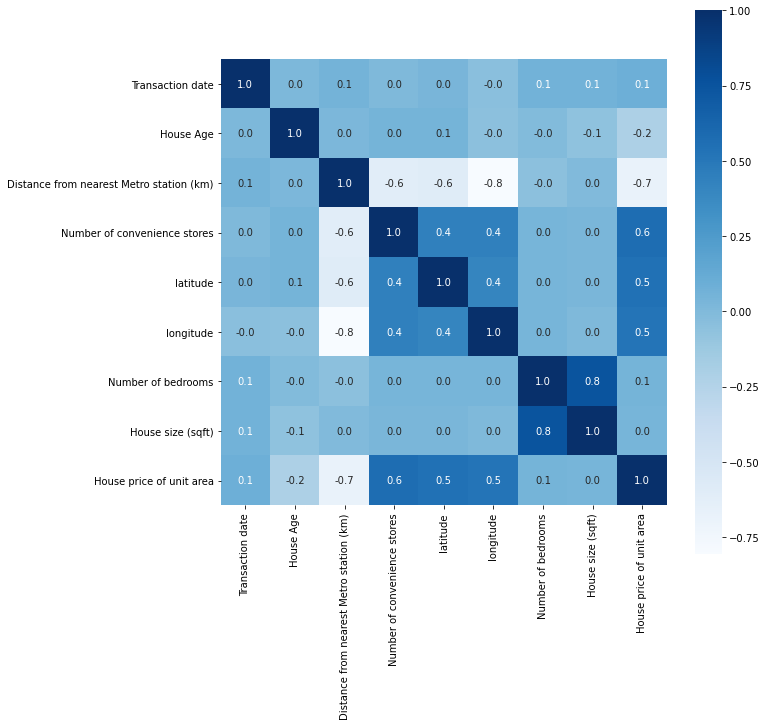

In [128]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Blues')

### Important points from the correlation heatmap

#### 1. Distance from nearest metro station is negatively correlated with the price of the house. This means that the price of the house will decrease as the distance  of the nearest metro station increases.
#### 2. Number of convenience stores near the house is positively correlated with the price of the house. This means that the price of house will increase as the number of the convenience stores near the house increases.
#### 3. The age of house is also slightly negatively correlated with the price of the house.
#### 4. Some highly correlated features are number of bedrooms positively correlated to the size of house, number of convenience store negatively correlated to distance from metro station etc.

## Performing some data modification for a clean dataset

### 1. Changing the Transaction date to Transaction Year 

In [129]:
df['Transaction date'].apply(np.floor)

0      2012.0
1      2012.0
2      2013.0
3      2013.0
4      2012.0
        ...  
409    2013.0
410    2012.0
411    2013.0
412    2013.0
413    2013.0
Name: Transaction date, Length: 414, dtype: float64

In [130]:
df['Transaction date'] = df['Transaction date'].apply(np.floor)


In [131]:
df.rename(columns = {'Transaction date':'Transaction Year'}, inplace=True)

In [132]:
df.head()

,Transaction Year,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.0,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.0,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.0,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.0,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [133]:
df = df.astype({'Transaction Year':int})

In [134]:
df.head()

,Transaction Year,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


### 2. Rounding the distance values to 2 decimal places

In [135]:
df['Distance from nearest Metro station (km)'] = df['Distance from nearest Metro station (km)'].round(2)

In [136]:
df.head()

,Transaction Year,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012,32.0,84.88,10,24.98298,121.54024,1,575,37.9
1,2012,19.5,306.59,9,24.98034,121.53951,2,1240,42.2
2,2013,13.3,561.98,5,24.98746,121.54391,3,1060,47.3
3,2013,13.3,561.98,5,24.98746,121.54391,2,875,54.8
4,2012,5.0,390.57,5,24.97937,121.54245,1,491,43.1


## Data Visualisation 

### 1. A joint plot showing that the increase in convenience stores nearby the house is increasing the value of the house

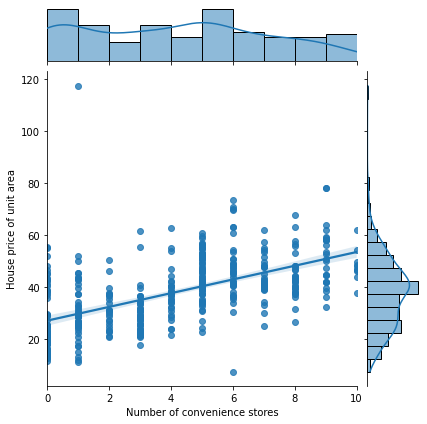

In [137]:
sns.jointplot(x='Number of convenience stores',y='House price of unit area',data=df, kind='reg')

### 2. A joint plot showing that if the distance of the nearest metro is less, then it increases the price of the house

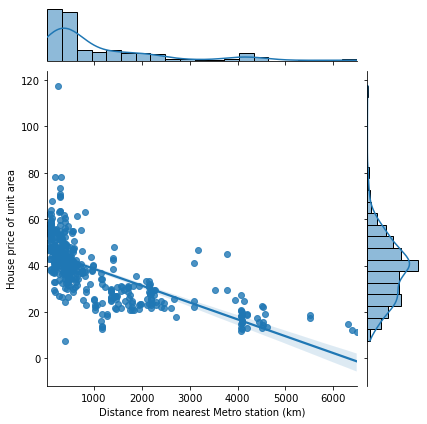

In [138]:
sns.jointplot(x='Distance from nearest Metro station (km)',y='House price of unit area',data=df, kind='reg')

## Splitting the dataset into Features and Target 

In [139]:
X = df.drop(['House price of unit area'],axis=1) # saving all the features into a variable

In [140]:
Y = df['House price of unit area'] # storing the target variable seperately

## Splitting the data into training data and Test data

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [142]:
print(X_train.shape, X_test.shape, X.shape)

(331, 8) (83, 8) (414, 8)


## Model 1 - Linear Regressor

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
model1 = LinearRegression()

In [145]:
model1.fit(X_train,Y_train) #training the model using Xtrain

LinearRegression()

In [146]:
train_pred1 = model1.predict(X_train) #predicted values on training data
#print(train_pred)

### The accuracy of regression models are determined using R-squared error and Mean Absolute Error values

In [147]:
#Training
#R squared error of training data using model1
r1 = metrics.r2_score(Y_train, train_pred1)

#Mean Absolute error of training data using model1
mae1 = metrics.mean_absolute_error(Y_train, train_pred1)

print('R-Squared Error :',r1)
print('Mean Absolute Error :',mae1)

R-Squared Error : 0.5964052380475854
Mean Absolute Error : 6.215849651425946


In [148]:
test_pred1 = model1.predict(X_test) #predicted values on test data

In [149]:
#Test
#R squared error of testing data using model1
test_r1 = metrics.r2_score(Y_test, test_pred1)

#Mean Absolute error of training data using model1
test_mae1 = metrics.mean_absolute_error(Y_test, test_pred1)

print('R-Squared Error :',test_r1)
print('Mean Absolute Error :',test_mae1)

R-Squared Error : 0.5132936559970761
Mean Absolute Error : 5.98734132930809


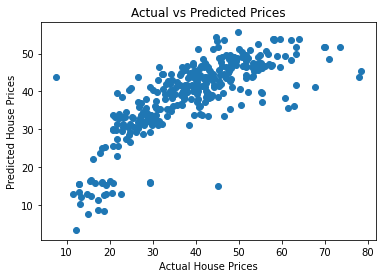

In [150]:
#Visualising the predicted and actual values

plt.scatter(Y_train,train_pred1)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

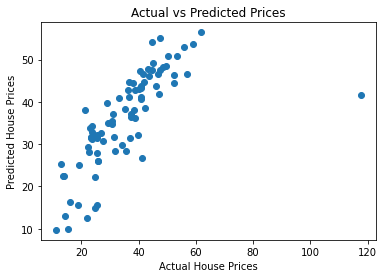

In [151]:
plt.scatter(Y_test,test_pred1)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Here, Linear Regression model is giving us a not very linear result. The mean absolute error is high, which means the predictions are moslty inaccurate. Linear Regressor will not be our choice of model for this problem statement. Linear regression model often suffers from multicolinearity, and is very sensitive to outliers. Linear Regression has a big disadvantage of assuming the linearity between the dependent and independent variables

## Model 2 - XGB Regressor

In [152]:
from xgboost import XGBRegressor

In [153]:
model2 = XGBRegressor()

In [154]:
model2.fit(X_train, Y_train) #training the model 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [155]:
train_pred2 = model2.predict(X_train) #predicted values on train data

In [156]:
#Training
#R squared error of training data using model2
r2 = metrics.r2_score(Y_train, train_pred2)

#Mean Absolute error of training data using model2
mae2 = metrics.mean_absolute_error(Y_train, train_pred2)

print('R-Squared Error :',r2)
print('Mean Absolute Error :',mae2)

R-Squared Error : 0.9999673433547113
Mean Absolute Error : 0.05181207973791376


In [157]:
test_pred2 = model2.predict(X_test) #predicted values on test data

In [158]:
#Test
#R squared error of testing data using model1
test_r2 = metrics.r2_score(Y_test, test_pred2)

#Mean Absolute error of training data using model1
test_mae2 = metrics.mean_absolute_error(Y_test, test_pred2)

print('R-Squared Error :',test_r2)
print('Mean Absolute Error :',test_mae2)

R-Squared Error : 0.575631970331425
Mean Absolute Error : 4.884651115141719


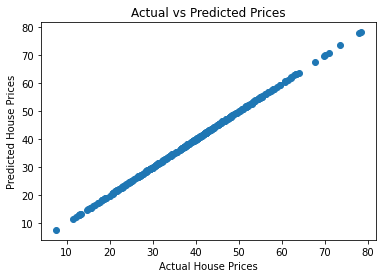

In [159]:
plt.scatter(Y_train,train_pred2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

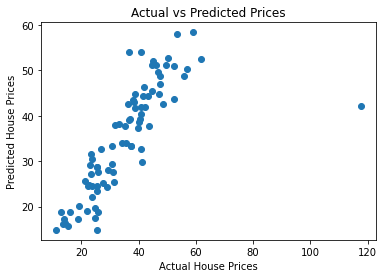

In [160]:
plt.scatter(Y_test,test_pred2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Using the XGBoost regressor, training results are very good but the testing results are not that impressive. The Mean Absolute error is very near to 5, so the results are a bit inaccurate. We are getting better results than other models because xgboost is one of the best models which combines predictions of several decision trees to produce a much strong result. The only drawback that this model has is that it's algorithm is unable to judge target values beyond the limits of training data

## Model 3 - KNN

In [161]:
from sklearn.neighbors import KNeighborsRegressor

In [162]:
model3 = KNeighborsRegressor()

In [163]:
model3.fit(X_train, Y_train)

KNeighborsRegressor()

In [164]:
train_pred3 = model3.predict(X_train)

In [165]:
#Training
#R squared error of training data using model3
r3 = metrics.r2_score(Y_train, train_pred3)

#Mean Absolute error of training data using model3
mae3 = metrics.mean_absolute_error(Y_train, train_pred3)

print('R-Squared Error :',r3)
print('Mean Absolute Error :',mae3)

R-Squared Error : 0.6889631620369686
Mean Absolute Error : 5.441993957703928


In [166]:
test_pred3 = model3.predict(X_test)

In [167]:
#Test
#R squared error of testing data using model3
test_r3 = metrics.r2_score(Y_test, test_pred3)

#Mean Absolute error of training data using model3
test_mae3 = metrics.mean_absolute_error(Y_test, test_pred3)

print('R-Squared Error :',test_r3)
print('Mean Absolute Error :',test_mae3)

R-Squared Error : 0.5576030177225157
Mean Absolute Error : 5.743855421686747


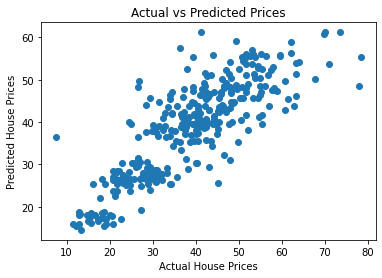

In [168]:
plt.scatter(Y_train,train_pred3)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

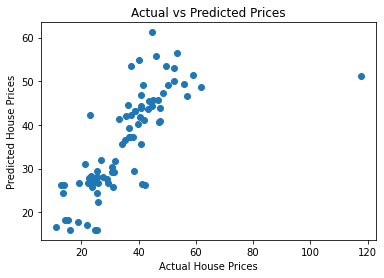

In [169]:
plt.scatter(Y_test,test_pred3)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### Using KNN, we are not getting accurate values here. KNN is verty sensitive to the scale of data and the number of irrelevant features.

## Model 4 - Decision Tree

In [170]:
from sklearn.tree import DecisionTreeRegressor

In [171]:
model4 = DecisionTreeRegressor()

In [172]:
model4.fit(X_train,Y_train)

DecisionTreeRegressor()

In [173]:
train_pred4 = model3.predict(X_train)

In [174]:
#Training
#R squared error of training data using model4
r4 = metrics.r2_score(Y_train, train_pred4)

#Mean Absolute error of training data using model4
mae4 = metrics.mean_absolute_error(Y_train, train_pred4)

print('R-Squared Error :',r4)
print('Mean Absolute Error :',mae4)

R-Squared Error : 0.6889631620369686
Mean Absolute Error : 5.441993957703928


In [175]:
test_pred4 = model4.predict(X_test)

In [176]:
#Test
#R squared error of testing data using model3
test_r4 = metrics.r2_score(Y_test, test_pred4)

#Mean Absolute error of training data using model3
test_mae4 = metrics.mean_absolute_error(Y_test, test_pred4)

print('R-Squared Error :',test_r4)
print('Mean Absolute Error :',test_mae4)

R-Squared Error : 0.5026719914646506
Mean Absolute Error : 5.659036144578312


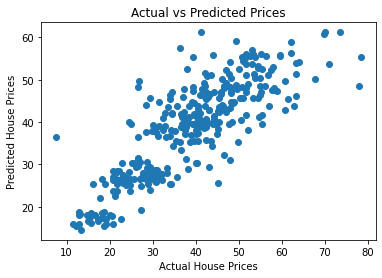

In [177]:
plt.scatter(Y_train,train_pred3)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


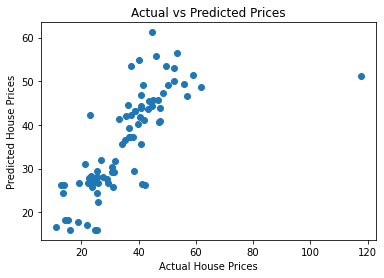

In [178]:
plt.scatter(Y_test,test_pred3)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## Decision Tree Regressor is not giving ideal results for us. Decision Trees are inadequate for regression and for predicting continous values

# Final Result

## We will conclude that Model2 - XGBoost Regressor is the ideal model which is predicting accurate values of the house. 